In [3]:
!pip install pydicom
!pip install rt_utils


## แปลง .dcm to .nii.gz

มีสองส่วน
1.stack ภาพ ct-scan แล้วแปลงเป็น .nii.gz
2.แปลง ไฟล์ segment เป็น .nii.gz มันมีโครงสร้างแบบ RTStruct

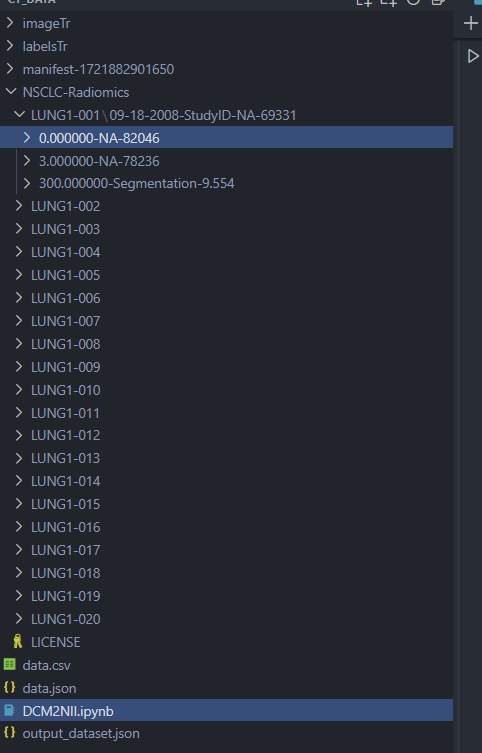


In [1]:
!pip install dcmstack

   ---------------------------------------- 0.0/42.0 kB ? eta -:--:--
   ------------------- -------------------- 20.5/42.0 kB ? eta -:--:--
   ---------------------------------------- 42.0/42.0 kB 1.0 MB/s eta 0:00:00
   ---------------------------------------- 0.0/743.6 kB ? eta -:--:--
   ------------ --------------------------- 225.3/743.6 kB 6.9 MB/s eta 0:00:01
   ------------------------------------- -- 696.3/743.6 kB 8.8 MB/s eta 0:00:01
   ---------------------------------------- 743.6/743.6 kB 9.4 MB/s eta 0:00:00


In [35]:
!pip install dicom

   ---------------------------------------- 0.0/766.3 kB ? eta -:--:--
   - ------------------------------------- 20.5/766.3 kB 682.7 kB/s eta 0:00:02
   ---- ----------------------------------- 92.2/766.3 kB 1.3 MB/s eta 0:00:01
   ---------------------------------------  757.8/766.3 kB 8.0 MB/s eta 0:00:01
   ---------------------------------------- 766.3/766.3 kB 8.1 MB/s eta 0:00:00


In [78]:
import SimpleITK as sitk

reader = sitk.ImageSeriesReader()
dicom_names = reader.GetGDCMSeriesFileNames('./NSCLC-Radiomics/LUNG1-001/09-18-2008-StudyID-NA-69331/0.000000-NA-82046')
reader.SetFileNames(dicom_names)
image = reader.Execute()


sitk.WriteImage(image, 'M0_1.nii.gz')

In [9]:
import os

# Define the directory containing the files
directory = './NSCLC_46Case/labelsTr'

# Loop through each file in the directory
for filename in os.listdir(directory):
    # Check if the file has the pattern 'LUNG1_' and ends with '.nii.gz'
    if filename.startswith('LUNG1_') and filename.endswith('.nii.gz'):
        # Construct the new filename
        new_filename = filename.replace('LUNG1_', 'LUNG1-')
        # Get the full paths for the old and new filenames
        old_file = os.path.join(directory, filename)
        new_file = os.path.join(directory, new_filename)
        # Rename the file
        os.rename(old_file, new_file)
        print(f'Renamed: {filename} -> {new_filename}')


Renamed: LUNG1_001.nii.gz -> LUNG1-001.nii.gz
Renamed: LUNG1_002.nii.gz -> LUNG1-002.nii.gz
Renamed: LUNG1_003.nii.gz -> LUNG1-003.nii.gz
Renamed: LUNG1_004.nii.gz -> LUNG1-004.nii.gz
Renamed: LUNG1_005.nii.gz -> LUNG1-005.nii.gz
Renamed: LUNG1_006.nii.gz -> LUNG1-006.nii.gz
Renamed: LUNG1_007.nii.gz -> LUNG1-007.nii.gz
Renamed: LUNG1_008.nii.gz -> LUNG1-008.nii.gz
Renamed: LUNG1_009.nii.gz -> LUNG1-009.nii.gz
Renamed: LUNG1_010.nii.gz -> LUNG1-010.nii.gz
Renamed: LUNG1_011.nii.gz -> LUNG1-011.nii.gz
Renamed: LUNG1_012.nii.gz -> LUNG1-012.nii.gz
Renamed: LUNG1_013.nii.gz -> LUNG1-013.nii.gz
Renamed: LUNG1_014.nii.gz -> LUNG1-014.nii.gz
Renamed: LUNG1_015.nii.gz -> LUNG1-015.nii.gz
Renamed: LUNG1_016.nii.gz -> LUNG1-016.nii.gz
Renamed: LUNG1_017.nii.gz -> LUNG1-017.nii.gz
Renamed: LUNG1_018.nii.gz -> LUNG1-018.nii.gz
Renamed: LUNG1_019.nii.gz -> LUNG1-019.nii.gz
Renamed: LUNG1_020.nii.gz -> LUNG1-020.nii.gz
Renamed: LUNG1_022.nii.gz -> LUNG1-022.nii.gz
Renamed: LUNG1_024.nii.gz -> LUNG1

In [8]:
import os
import dcmstack
from glob import glob
import dcmstack, dicom
from glob import glob
from pathlib import Path # pathlib for easy path handling
import pydicom # pydicom to handle dicom files
import matplotlib.pyplot as plt
import numpy as np
import dicom2nifti # to convert DICOM files to the NIftI format
import nibabel as nib # nibabel to handle nifti files
import SimpleITK as sitk

# Define the base directory
base_dir = './NSCLC-Radiomics1'

# Function to process a series directory
def process_series(patient_dir, series_dir):
    series_path = series_dir
    print(f"Processing series directory: {series_path}")  # Debugging line
    
    # Get all DICOM files in the series directory
    src_dcms = glob(os.path.join(series_path, '*.dcm'))
    
    # Check if there are any DICOM files
    if src_dcms:
        try:
           
            # Define the output filename
            output_filename = f"{os.path.basename(patient_dir)}.nii.gz"
            output_path = os.path.join(base_dir, output_filename)
            reader = sitk.ImageSeriesReader()
            dicom_names = reader.GetGDCMSeriesFileNames(series_path)
            reader.SetFileNames(dicom_names)
            image = reader.Execute()


            sitk.WriteImage(image, output_path)
            
            
            
            print(f"Converted {series_path} to {output_path}")
         
        except Exception as e:
            print(f"Error processing {series_path}: {e}")
    else:
        print(f"No DICOM files found in {series_path}")

# Iterate through each patient's directory
for patient_dir in os.listdir(base_dir):
    patient_path = os.path.join(base_dir, patient_dir)
    print(f"Processing patient directory: {patient_path}")  # Debugging line
    
    # Check if it's a directory
    if os.path.isdir(patient_path):
        # Iterate through all sub-directories within the patient directory
        for sub_dir in os.listdir(patient_path):
            sub_path = os.path.join(patient_path, sub_dir)
            # print(sub_path)
            for sub_fol in os.listdir(sub_path):
                sub_fol = os.path.join(sub_path, sub_fol)
                print(sub_fol)
                if os.path.isdir(sub_fol):
                    print(f"Found DICOM series directory: {sub_fol}")  # Debugging line
                    # Process the DICOM series directory
                    process_series(patient_path, sub_fol)
                    break


d:\anaconda\Lib\site-packages\dicom\__init__.py:53: UserWarning: 
This code is using an older version of pydicom, which is no longer 
maintained as of Jan 2017.  You can access the new pydicom features and API 
by installing `pydicom` from PyPI.
See 'Transitioning to pydicom 1.x' section at pydicom.readthedocs.org 
for more information.

  warnings.warn(msg)


Processing patient directory: ./NSCLC-Radiomics1\LUNG1-024
./NSCLC-Radiomics1\LUNG1-024\01-01-2014-StudyID-NA-55010\1.000000-NA-89883
Found DICOM series directory: ./NSCLC-Radiomics1\LUNG1-024\01-01-2014-StudyID-NA-55010\1.000000-NA-89883
Processing series directory: ./NSCLC-Radiomics1\LUNG1-024\01-01-2014-StudyID-NA-55010\1.000000-NA-89883
Converted ./NSCLC-Radiomics1\LUNG1-024\01-01-2014-StudyID-NA-55010\1.000000-NA-89883 to ./NSCLC-Radiomics1\LUNG1-024.nii.gz
Processing patient directory: ./NSCLC-Radiomics1\LUNG1-025
./NSCLC-Radiomics1\LUNG1-025\01-05-2005-StudyID-NA-11391\1.000000-NA-17063
Found DICOM series directory: ./NSCLC-Radiomics1\LUNG1-025\01-05-2005-StudyID-NA-11391\1.000000-NA-17063
Processing series directory: ./NSCLC-Radiomics1\LUNG1-025\01-05-2005-StudyID-NA-11391\1.000000-NA-17063
Converted ./NSCLC-Radiomics1\LUNG1-025\01-05-2005-StudyID-NA-11391\1.000000-NA-17063 to ./NSCLC-Radiomics1\LUNG1-025.nii.gz
Processing patient directory: ./NSCLC-Radiomics1\LUNG1-026
./NSCLC

กำลังลองอันนี้
อ้างอิงจาก https://github.com/Project-MONAI/tutorials/blob/main/3d_segmentation/brats_segmentation_3d.ipynb

In [7]:
# listS = [40, 41, 43, 48, 49, 51, 52, 57, 59, 62, 65, 69, 70, 89, 95, 107, 114]
strS = "22 27 30 31 32 35 42 45 46 47 50 53 54 55 58 60 61 63 64 67 68 71 72 73 74 75 76 77 78 79 81 82 84 85 86 88 91 92 93 96 97 98 99 101 102 103 104 105 106 108 109 110 112 113 115 116 117 118 119 120"
listS = strS.split()
listJ =[]
import json
with open('data.json', 'w') as f:
    for i in listS:
        # print(i)
        i = int(i)
        if i < 100:
            data = {
                "PatientID": "LUNG1-0"+str(i),
                "image": "./imagesTr/LUNG1_0"+str(i)+".nii.gz",
                "label": "./labelsTr/LUNG1_0"+str(i)+".nii.gz"
            }
        if i >= 100:
            data = {
                "PatientID": "LUNG1-"+str(i),
                "image": "./imagesTr/LUNG1_"+str(i)+".nii.gz",
                "label": "./labelsTr/LUNG1_"+str(i)+".nii.gz"
            }

        listJ.append(data)
    json.dump(listJ, f)    
    
print(listJ)


[{'PatientID': 'LUNG1-022', 'image': './imagesTr/LUNG1_022.nii.gz', 'label': './labelsTr/LUNG1_022.nii.gz'}, {'PatientID': 'LUNG1-027', 'image': './imagesTr/LUNG1_027.nii.gz', 'label': './labelsTr/LUNG1_027.nii.gz'}, {'PatientID': 'LUNG1-030', 'image': './imagesTr/LUNG1_030.nii.gz', 'label': './labelsTr/LUNG1_030.nii.gz'}, {'PatientID': 'LUNG1-031', 'image': './imagesTr/LUNG1_031.nii.gz', 'label': './labelsTr/LUNG1_031.nii.gz'}, {'PatientID': 'LUNG1-032', 'image': './imagesTr/LUNG1_032.nii.gz', 'label': './labelsTr/LUNG1_032.nii.gz'}, {'PatientID': 'LUNG1-035', 'image': './imagesTr/LUNG1_035.nii.gz', 'label': './labelsTr/LUNG1_035.nii.gz'}, {'PatientID': 'LUNG1-042', 'image': './imagesTr/LUNG1_042.nii.gz', 'label': './labelsTr/LUNG1_042.nii.gz'}, {'PatientID': 'LUNG1-045', 'image': './imagesTr/LUNG1_045.nii.gz', 'label': './labelsTr/LUNG1_045.nii.gz'}, {'PatientID': 'LUNG1-046', 'image': './imagesTr/LUNG1_046.nii.gz', 'label': './labelsTr/LUNG1_046.nii.gz'}, {'PatientID': 'LUNG1-047', 

In [3]:
f

<_io.TextIOWrapper name='data.json' mode='w' encoding='utf-8'>

Let' get it in Swin

In [5]:
!python -c "import monai; import nibabel; import tqdm" || pip install -q "monai-weekly[nibabel, tqdm]"
!python -c "import matplotlib" || pip install -q matplotlib
%matplotlib inline

In [6]:
!pip install "monai[einops]"

In [ ]:
!pip install nibabel

In [25]:
!pip install -q "monai-weekly[all]"

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gensim 4.3.0 requires FuzzyTM>=0.4.0, which is not installed.


In [ ]:
import pydicom
import pydicom_seg
import SimpleITK as sitk

dcm = pydicom.dcmread('./NSCLC-Radiomics/LUNG1-001/09-18-2008-StudyID-NA-69331/3.000000-NA-78236/1-1.dcm')

reader = pydicom_seg.MultiClassReader()
result = reader.read(dcm)

image_data = result.data  # directly available
image = result.image  # lazy construction
# sitk.WriteImage(image, '/tmp/segmentation.nrrd', True)

In [6]:
import os
import shutil
import tempfile
import time
import matplotlib.pyplot as plt
from monai.apps import DecathlonDataset
from monai.config import print_config
from monai.data import (
    ThreadDataLoader,
    CacheDataset,
    load_decathlon_datalist,
    decollate_batch,
    set_track_meta,
)
from monai.handlers.utils import from_engine
from monai.losses import DiceLoss
from monai.inferers import sliding_window_inference
from monai.metrics import DiceMetric
from monai.networks.nets import SegResNet
from monai.transforms import (
    Activations,
    Activationsd,
    AsDiscrete,
    AsDiscreted,
    ScaleIntensityRanged,
    CropForegroundd,
    Compose,
    Invertd,
    LoadImaged,
    MapTransform,
    NormalizeIntensityd,
    Orientationd,
    RandFlipd,
    RandScaleIntensityd,
    RandShiftIntensityd,
    RandCropByPosNegLabeld,
    RandRotate90d,
    RandSpatialCropd,
    Spacingd,
    EnsureTyped,
    EnsureChannelFirstd,
)
from monai.utils import set_determinism
from tqdm import tqdm

import torch

print_config()

MONAI version: 1.4.dev2430
Numpy version: 1.26.4
Pytorch version: 2.2.2+cu118
MONAI flags: HAS_EXT = False, USE_COMPILED = False, USE_META_DICT = False
MONAI rev id: 9dd92b4a07706d4b80edace3d39fe008dc805d5a
MONAI __file__: d:\anaconda\Lib\site-packages\monai\__init__.py

Optional dependencies:
Pytorch Ignite version: 0.4.11
ITK version: 5.4.0
Nibabel version: 5.2.1
scikit-image version: 0.22.0
scipy version: 1.14.0
Pillow version: 10.2.0
Tensorboard version: 2.17.0
gdown version: 5.2.0
TorchVision version: 0.17.2+cu118
tqdm version: 4.65.0
lmdb version: 1.4.1
psutil version: 5.9.0
pandas version: 2.1.4
einops version: 0.7.0
transformers version: 4.39.1
mlflow version: 2.14.3
pynrrd version: 1.0.0
clearml version: 1.16.3rc2

For details about installing the optional dependencies, please visit:
    https://docs.monai.io/en/latest/installation.html#installing-the-recommended-dependencies



In [21]:
import pandas as pd
clinical_data = pd.read_csv("./data.csv")

In [8]:
set_determinism(seed=0)

In [80]:
class ConvertToStage(MapTransform):
    """
    Convert labels to stage of lung cancer
    """
    def __init__(self, keys, clinical_data):
        self.keys = keys
        self.clinical_data = clinical_data
        self.stage = ["adenocarcinoma", "squamous cell carcinoma", "large cell", "nos"]
        super().__init__(keys)
    stage = ["adenocarcinoma", "squamous cell carcinoma", "large cell", "nos"]
    
    
    def __call__(self, data):
        d = dict(data)
        # Add additional labels from clinical data
        patient_id = d["PatientID"]
        clinical_info = self.clinical_data[self.clinical_data["PatientID"] == patient_id]
        overall_stage = clinical_info["Histology"].values[0]
        
        id = self.stage.index(overall_stage)
        
        for key in self.keys:
            # Create a mask for all non-zero elements
            mask = d[key] != 0
            # Replace all non-zero elements with the stage index + 1
            d[key][mask] = int(id) + 1
        return d


In [79]:
num_samples = 2
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

train_transforms = Compose(
    [
        LoadImaged(keys=["image", "label"], ensure_channel_first=True),
        ConvertToMultiChannelBasedOnBratsClassesd(keys="label" ,clinical_data = clinical_data),
        ScaleIntensityRanged(
            keys=["image"],
            a_min=-175,
            a_max=250,
            b_min=0.0,
            b_max=1.0,
            clip=True,
        ),
        CropForegroundd(keys=["image", "label"], source_key="image"),
        Orientationd(keys=["image", "label"], axcodes="RAS"),
        Spacingd(
            keys=["image", "label"],
            pixdim=(1.5, 1.5, 2.0),
            mode=("bilinear", "nearest"),
        ),
        EnsureTyped(keys=["image", "label"], device=device, track_meta=False),
        RandCropByPosNegLabeld(
            keys=["image", "label"],
            label_key="label",
            spatial_size=(96, 96, 96),
            pos=1,
            neg=1,
            num_samples=num_samples,
            image_key="image",
            image_threshold=0,
        ),
        RandFlipd(
            keys=["image", "label"],
            spatial_axis=[0],
            prob=0.10,
        ),
        RandFlipd(
            keys=["image", "label"],
            spatial_axis=[1],
            prob=0.10,
        ),
        RandFlipd(
            keys=["image", "label"],
            spatial_axis=[2],
            prob=0.10,
        ),
        RandRotate90d(
            keys=["image", "label"],
            prob=0.10,
            max_k=3,
        ),
        RandShiftIntensityd(
            keys=["image"],
            offsets=0.10,
            prob=0.50,
        ),
    ]
)
val_transforms = Compose(
    [
        LoadImaged(keys=["image", "label"], ensure_channel_first=True),
        ConvertToMultiChannelBasedOnBratsClassesd(keys="label" ,clinical_data = clinical_data),
        ScaleIntensityRanged(keys=["image"], a_min=-175, a_max=250, b_min=0.0, b_max=1.0, clip=True),
        CropForegroundd(keys=["image", "label"], source_key="image"),
        Orientationd(keys=["image", "label"], axcodes="RAS"),
        Spacingd(
            keys=["image", "label"],
            pixdim=(1.5, 1.5, 2.0),
            mode=("bilinear", "nearest"),
        ),
        EnsureTyped(keys=["image", "label"], device=device, track_meta=True),
    ]
)

monai.transforms.croppad.dictionary CropForegroundd.__init__:allow_smaller: Current default value of argument `allow_smaller=True` has been deprecated since version 1.2. It will be changed to `allow_smaller=False` in version 1.5.


In [82]:
set_track_meta(True)

In [83]:
data_dir = "./"
split_json = "output_dataset.json"

datasets = data_dir + split_json
datalist = load_decathlon_datalist(datasets, True, "training")
val_files = load_decathlon_datalist(datasets, True, "training")
train_ds = CacheDataset(
    data=datalist,
    transform=train_transforms,
    cache_num=24,
    cache_rate=1.0,
    num_workers=8,
)
train_loader = ThreadDataLoader(train_ds, num_workers=0, batch_size=1, shuffle=True)
val_ds = CacheDataset(data=val_files, transform=val_transforms, cache_num=6, cache_rate=1.0, num_workers=4)
val_loader = ThreadDataLoader(val_ds, num_workers=0, batch_size=1)

# as explained in the "Setup transforms" section above, we want cached training images to not have metadata, and validations to have metadata
# the EnsureTyped transforms allow us to make this distinction
# on the other hand, set_track_meta is a global API; doing so here makes sure subsequent transforms (i.e., random transforms for training)
# will be carried out as Tensors, not MetaTensors
set_track_meta(False)

Loading dataset: 100%|██████████| 1/1 [00:04<00:00,  4.75s/it]


In [ ]:
slice_map = {
    "LUNG1_001.nii.gz": 50,
    "LUNG1_002.nii.gz": 140,
    "img0037.nii.gz": 204,
    "img0038.nii.gz": 204,
    "img0039.nii.gz": 204,
    "img0040.nii.gz": 180,
}
case_num = 0
img_name = os.path.split(val_ds[case_num]["image"].meta["filename_or_obj"])[1]
print(img_name)
img = val_ds[case_num]["image"]
label = val_ds[case_num]["label"]
img_shape = img.shape
label_shape = label.shape
print(f"image shape: {img_shape}, label shape: {label_shape}")
plt.figure("image", (18, 6))
plt.subplot(1, 2, 1)
plt.title("image")
plt.imshow(img[0, :, :, slice_map[img_name]].detach().cpu(), cmap="gray")
plt.subplot(1, 2, 2)
plt.title("label")
plt.imshow(label[0, :, :, slice_map[img_name]].detach().cpu())
plt.show()

M0_1.nii.gz
image shape: torch.Size([1, 274, 286, 200]), label shape: torch.Size([1, 274, 286, 200])


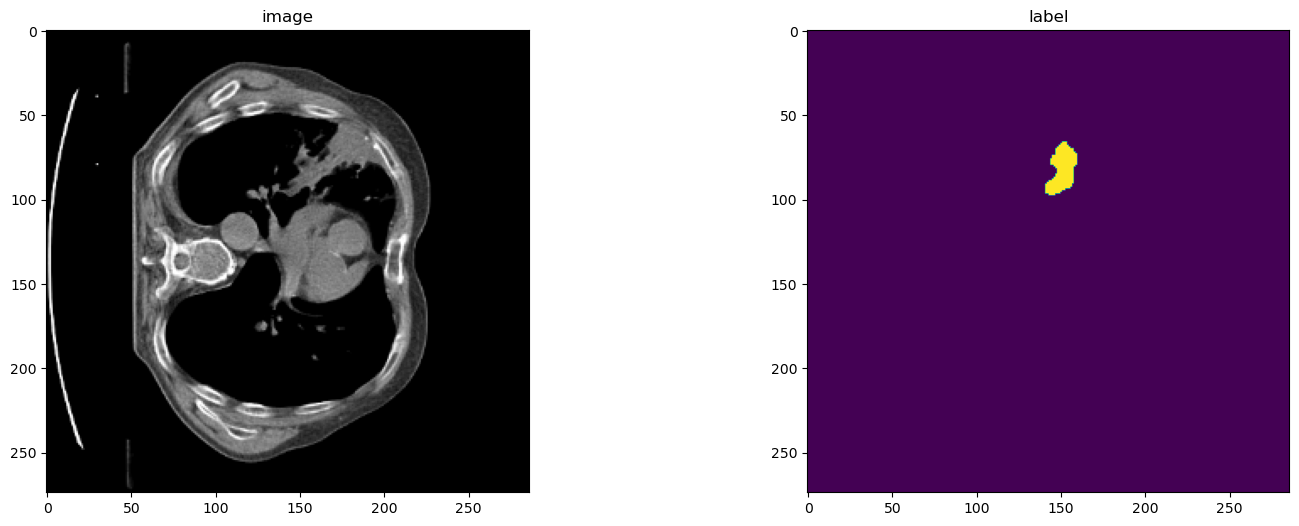

In [86]:
slice_map = {
    "M0_1.nii.gz": 100,
    "LUNG1_002.nii.gz": 140,
    "img0037.nii.gz": 204,
    "img0038.nii.gz": 204,
    "img0039.nii.gz": 204,
    "img0040.nii.gz": 180,
}
case_num = 0
img_name = os.path.split(val_ds[case_num]["image"].meta["filename_or_obj"])[1]
print(img_name)
img = val_ds[case_num]["image"]
label = val_ds[case_num]["label"]
img_shape = img.shape
label_shape = label.shape
print(f"image shape: {img_shape}, label shape: {label_shape}")
plt.figure("image", (18, 6))
plt.subplot(1, 2, 1)
plt.title("image")
plt.imshow(img[0, :, :, slice_map[img_name]].detach().cpu(), cmap="gray")
plt.subplot(1, 2, 2)
plt.title("label")
plt.imshow(label[0, :, :, slice_map[img_name]].detach().cpu())
plt.show()

In [ ]:
label

In [19]:
from monai.transforms import ConvertToMultiChannelBasedOnBratsClassesd

transform = ConvertToMultiChannelBasedOnBratsClassesd(keys=["image", "label"])


In [ ]:
from tqdm import tqdm

In [ ]:
img_path = './NSCLC-Radiomics/LUNG1-005/01-01-2014-StudyID-NA-93819/2.000000-NA-99068/1-1.dcm'

In [ ]:
import pydicom
dcm_img = pydicom.dcmread(img_path, force=True)
dcm_img

In [ ]:
print("Dataset.file_meta" in dcm_img)

False


In [3]:
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
from monai.networks.nets import SwinUNETR
model = SwinUNETR(
    img_size=(96, 96, 96),
    in_channels=1,
    out_channels=5,
    feature_size=48,
    use_checkpoint=True,
).to(device)

monai.networks.nets.swin_unetr SwinUNETR.__init__:img_size: Argument `img_size` has been deprecated since version 1.3. It will be removed in version 1.5. The img_size argument is not required anymore and checks on the input size are run during forward().


In [13]:
output.nonzero()

(array([94, 94, 94, 94], dtype=int64),
 array([1, 1, 1, 1], dtype=int64),
 array([57, 81, 82, 83], dtype=int64))

In [ ]:
import os
import torch
import numpy as np
import plotly.graph_objects as go
from monai.transforms import (
    Compose, LoadImage, ScaleIntensity, EnsureType, SpatialPad, EnsureChannelFirst, Resize
)
from monai.inferers import Inferer

os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
from monai.networks.nets import SwinUNETR
model = SwinUNETR(
    img_size=(96, 96, 96),
    in_channels=1,
    out_channels=5,
    feature_size=48,
    use_checkpoint=True,
)
model.load_state_dict(torch.load("./best_metric_model (1).pth", map_location=torch.device('cpu')))
# Load your model
model.to('cpu')

# Enable metadata tracking
set_track_meta(True)

# Define transformations with padding to ensure dimensions are divisible by 32
transforms = Compose([
    LoadImage(image_only=True), 
    EnsureChannelFirst(), 
    ScaleIntensity(), 
    Resize(spatial_size=[96, 96, 96]),  # Resize to match the model's input size requirement
    EnsureType()
])

# Load a sample file (adjust the path and filename as necessary)
root_dir = "./imagesTr"
filename = "LUNG1_001.nii.gz"
img = transforms(os.path.join(root_dir, filename))

# Prepare the image for inference
img = img.unsqueeze(0)  # Remove .cuda() to keep it on CPU



# Perform inference
with torch.no_grad():
    pred = inferer(inputs=img, network=model)
    print(pred)
    output = torch.argmax(pred, dim=1).detach().numpy()[0]  # Remove .cpu()

# Assuming the output has multiple classes, create a mask for each class
num_classes = output.max() + 1  # Adjust based on your model's number of output classes
fig = go.Figure()

# Create a 3D plot for each class
for class_id in range(1, num_classes):  # Start from 1 to skip background class 0
    binary_mask = (output == class_id).astype(np.uint8)
    fig.add_trace(go.Volume(
        x=np.arange(binary_mask.shape[0]),
        y=np.arange(binary_mask.shape[1]),
        z=np.arange(binary_mask.shape[2]),
        value=binary_mask,
        isomin=0,
        isomax=1,
        opacity=0.1,  # Adjust this for better visualization
        surface_count=20,  # Number of isosurfaces
        colorscale='Viridis',  # Or any other colorscale
        name=f'Class {class_id}'
    ))

fig.update_layout(scene=dict(
    xaxis_title='X',
    yaxis_title='Y',
    zaxis_title='Z',
    aspectmode='data'
))

fig.show()


In [ ]:
!pip install nibabel nilearn

In [2]:
import nibabel as nib
import torch

def load_nifti(file_path):
    nifti_img = nib.load(file_path)
    img_data = nifti_img.get_fdata()
    affine = nifti_img.affine
    header = nifti_img.header
    return img_data, affine, header


In [3]:
def preprocess_data(img_data):
    # Assuming the input is 3D with shape [D, H, W]
    img_data = torch.tensor(img_data, dtype=torch.float32).unsqueeze(0)  # Add batch dimension
    return img_data


In [5]:
from monai.inferers import sliding_window_inference

In [19]:
def run_inference(img_data, predictor, roi_size, sw_batch_size, device=None):
    if device is None:
        device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    img_data = img_data.to(device)
    output = sliding_window_inference(
        inputs=img_data,
        roi_size=roi_size,
        sw_batch_size=sw_batch_size,
        predictor=predictor,
        device=device
    )
    return output


In [30]:
import nibabel as nib

def save_nifti(output_data, affine, header, file_path):
    # Ensure tensor does not require gradients before converting to NumPy
    output_data = output_data.detach().cpu().numpy()
    output_img = nib.Nifti1Image(output_data.squeeze(), affine, header)
    nib.save(output_img, file_path)

def visualize_pulmonary_nodules(file_path, nodule_value=1):
    from nilearn import plotting
    import nibabel as nib
    import numpy as np

    # Load the NIfTI image
    img = nib.load(file_path)
    
    # Extract the data
    data = img.get_fdata()
    
    # Create a mask for nodules
    nodule_mask = np.where(data == nodule_value, 1, 0)
    
    # Create a new NIfTI image for the nodule mask
    nodule_img = nib.Nifti1Image(nodule_mask, img.affine, img.header)

    # Plot the nodules overlaid on the CT scan
    plotting.plot_glass_brain(
        nodule_img,
        display_mode='ortho',
        colorbar=True,
        title='Pulmonary Nodules',
        threshold=0.5,  # Set a threshold to visualize nodules
        cmap='autumn'   # Use a colormap to highlight the nodules
    )
    plotting.show()


In [20]:
import torch
import nibabel as nib

def load_nifti(file_path):
    nifti_img = nib.load(file_path)
    img_data = nifti_img.get_fdata()
    affine = nifti_img.affine
    header = nifti_img.header
    return img_data, affine, header

def preprocess_data(img_data):
    # Assuming the input is 2D with shape [H, W]
    img_data = torch.tensor(img_data, dtype=torch.float32).unsqueeze(0).unsqueeze(0)  # Add batch and channel dimensions
    return img_data

def run_inference(img_data, predictor, roi_size, sw_batch_size, device=None):
    if device is None:
        device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    
    img_data = img_data.to(device)
    output = sliding_window_inference(
        inputs=img_data,
        roi_size=roi_size,
        sw_batch_size=sw_batch_size,
        predictor=predictor,
        device=device
    )
    return output

def save_nifti(output_data, affine, header, file_path):
    output_img = nib.Nifti1Image(output_data.squeeze().cpu().numpy(), affine, header)
    nib.save(output_img, file_path)

def visualize_3d_segmentation(segmentation_data):
    from nilearn import plotting
    plotting.plot_glass_brain(segmentation_data, display_mode='ortho', colorbar=True)
    plotting.show()

from monai.networks.nets import SwinUNETR
model = SwinUNETR(
    img_size=(96, 96, 96),
    in_channels=1,
    out_channels=5,
    feature_size=48,
    use_checkpoint=True,
)
model.load_state_dict(torch.load("./best_metric_model (1).pth", map_location=torch.device('cpu')))
# Load your model
model.to('cpu')
# Paths
input_nifti_path = './imagesTr/LUNG1_001.nii.gz'
output_nifti_path = './output/output.nii.gz'


# Load NIfTI data
img_data, affine, header = load_nifti(input_nifti_path)
preprocessed_data = preprocess_data(img_data)

# Ensure roi_size matches the input dimensions
input_shape = preprocessed_data.shape[1:]  # Get [D, H, W]
roi_size = (96, 96, 96)  # Example ROI size for 2D


# Run inference
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
segmentation_output = run_inference(preprocessed_data, model, roi_size, 4, device='cpu')

# Assuming `segmentation_output` is 4D (e.g., [batch_size, channels, depth, height, width])
segmentation_output = segmentation_output[0, 0]  # Take the first batch and channel if applicable
# Save the output to NIfTI
save_nifti(segmentation_output, affine, header, output_nifti_path)


# Visualize the segmentation
visualize_3d_segmentation(output_nifti_path)


RuntimeError: Can't call numpy() on Tensor that requires grad. Use tensor.detach().numpy() instead.

In [1]:
import os
import shutil
import tempfile

import matplotlib.pyplot as plt
from tqdm import tqdm

from monai.losses import DiceCELoss
from monai.inferers import sliding_window_inference
from monai.transforms import (
    AsDiscrete,
    Compose,
    CropForegroundd,
    LoadImaged,
    Orientationd,
    EnsureChannelFirstd,
    RandFlipd,
    RandCropByPosNegLabeld,
    RandShiftIntensityd,
    ScaleIntensityRanged,
    Spacingd,
    RandRotate90d,
    EnsureTyped,
    MapTransform
)

from monai.config import print_config
from monai.metrics import DiceMetric
from monai.networks.nets import SwinUNETR

from monai.data import (
    ThreadDataLoader,
    CacheDataset,
    load_decathlon_datalist,
    decollate_batch,
    set_track_meta,
)


import torch

print_config()

MONAI version: 1.4.dev2430
Numpy version: 1.26.4
Pytorch version: 2.2.2+cu118
MONAI flags: HAS_EXT = False, USE_COMPILED = False, USE_META_DICT = False
MONAI rev id: 9dd92b4a07706d4b80edace3d39fe008dc805d5a
MONAI __file__: d:\anaconda\Lib\site-packages\monai\__init__.py

Optional dependencies:
Pytorch Ignite version: 0.4.11
ITK version: 5.4.0
Nibabel version: 5.2.1
scikit-image version: 0.22.0
scipy version: 1.14.0
Pillow version: 10.2.0
Tensorboard version: 2.17.0
gdown version: 5.2.0
TorchVision version: 0.17.2+cu118
tqdm version: 4.65.0
lmdb version: 1.4.1
psutil version: 5.9.0
pandas version: 2.1.4
einops version: 0.7.0
transformers version: 4.39.1
mlflow version: 2.14.3
pynrrd version: 1.0.0
clearml version: 1.16.3rc2

For details about installing the optional dependencies, please visit:
    https://docs.monai.io/en/latest/installation.html#installing-the-recommended-dependencies



In [3]:
class ConvertToStage(MapTransform):
    """
    Convert labels to stage of lung cancer
    """
    def __init__(self, keys, clinical_data):
        self.keys = keys
        self.clinical_data = clinical_data
        self.stage = ["I", "II", "III", "IIIa", "IIIb"]
        super().__init__(keys)
    stage = ["I", "II", "III", "IIIa", "IIIb"]
    
    
    def __call__(self, data):
        d = dict(data)
        # Add additional labels from clinical data
        patient_id = d["PatientID"]
        clinical_info = self.clinical_data[self.clinical_data["PatientID"] == patient_id]
        overall_stage = clinical_info["Overall.Stage"].values[0]
        
        id = self.stage.index(overall_stage)
        
        for key in self.keys:
            # Create a mask for all non-zero elements
            mask = d[key] != 0
            # Replace all non-zero elements with the stage index + 1
            d[key][mask] = int(id) + 1
        return d


In [5]:
import pandas as pd 
clinical_data = pd.read_csv('D:\CT_DATA\data.csv')

In [6]:
num_samples = 2
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

train_transforms = Compose(
    [
        LoadImaged(keys=["image", "label"], ensure_channel_first=True),
        ConvertToStage(keys="label", clinical_data = clinical_data),
        ScaleIntensityRanged(
            keys=["image"],
            a_min=-175,
            a_max=250,
            b_min=0.0,
            b_max=1.0,
            clip=True,
        ),
        CropForegroundd(keys=["image", "label"], source_key="image"),
        Orientationd(keys=["image", "label"], axcodes="RAS"),
        Spacingd(
            keys=["image", "label"],
            pixdim=(1.5, 1.5, 2.0),
            mode=("bilinear", "nearest"),
        ),
        EnsureTyped(keys=["image", "label"], device=device, track_meta=False),
        RandCropByPosNegLabeld(
            keys=["image", "label"],
            label_key="label",
            spatial_size=(96, 96, 96),
            pos=1,
            neg=1,
            num_samples=num_samples,
            image_key="image",
            image_threshold=0,
        ),
        RandFlipd(
            keys=["image", "label"],
            spatial_axis=[0],
            prob=0.10,
        ),
        RandFlipd(
            keys=["image", "label"],
            spatial_axis=[1],
            prob=0.10,
        ),
        RandFlipd(
            keys=["image", "label"],
            spatial_axis=[2],
            prob=0.10,
        ),
        RandRotate90d(
            keys=["image", "label"],
            prob=0.10,
            max_k=3,
        ),
        RandShiftIntensityd(
            keys=["image"],
            offsets=0.10,
            prob=0.50,
        ),
    ]
)
val_transforms = Compose(
    [
        LoadImaged(keys=["image", "label"], ensure_channel_first=True),
        ConvertToStage(keys="label" , clinical_data = clinical_data),
        ScaleIntensityRanged(keys=["image"], a_min=-175, a_max=250, b_min=0.0, b_max=1.0, clip=True),
        CropForegroundd(keys=["image", "label"], source_key="image"),
        Orientationd(keys=["image", "label"], axcodes="RAS"),
        Spacingd(
            keys=["image", "label"],
            pixdim=(1.5, 1.5, 2.0),
            mode=("bilinear", "nearest"),
        ),
        EnsureTyped(keys=["image", "label"], device=device, track_meta=True),
    ]
)

monai.transforms.croppad.dictionary CropForegroundd.__init__:allow_smaller: Current default value of argument `allow_smaller=True` has been deprecated since version 1.2. It will be changed to `allow_smaller=False` in version 1.5.


In [11]:
data_dir = "./kaggle_nsclc/"
split_json = "output_dataset1.json"

datasets = data_dir + split_json
datalist = load_decathlon_datalist(datasets, True, "training")
val_files = load_decathlon_datalist(datasets, True, "validation")
train_ds = CacheDataset(
    data=datalist,
    transform=train_transforms,
    cache_num=24,
    cache_rate=1.0,
    num_workers=8,
)
train_loader = ThreadDataLoader(train_ds, num_workers=0, batch_size=1, shuffle=True)
val_ds = CacheDataset(data=val_files, transform=val_transforms, cache_num=6, cache_rate=1.0, num_workers=4)
val_loader = ThreadDataLoader(val_ds, num_workers=0, batch_size=1)

# as explained in the "Setup transforms" section above, we want cached training images to not have metadata, and validations to have metadata
# the EnsureTyped transforms allow us to make this distinction
# on the other hand, set_track_meta is a global API; doing so here makes sure subsequent transforms (i.e., random transforms for training)
# will be carried out as Tensors, not MetaTensors
set_track_meta(False)

Loading dataset:   0%|          | 0/2 [00:00<?, ?it/s]

Loading dataset: 100%|██████████| 1/1 [00:03<00:00,  3.72s/it]


In [13]:
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = SwinUNETR(
    img_size=(96, 96, 96),
    in_channels=1,
    out_channels=6,
    feature_size=48,
    use_checkpoint=True,
).to(device)

monai.networks.nets.swin_unetr SwinUNETR.__init__:img_size: Argument `img_size` has been deprecated since version 1.3. It will be removed in version 1.5. The img_size argument is not required anymore and checks on the input size are run during forward().


In [16]:
weight = torch.load("./model_swinvit.pt")
model.load_from(weights=weight)
print("Using pretrained self-supervied Swin UNETR backbone weights !")

Using pretrained self-supervied Swin UNETR backbone weights !


In [ ]:
val_outputs.shape

In [ ]:
slice_map = {
    "LUNG1_019.nii.gz": 80,
    "LUNG1_002.nii.gz": 150,
    "img0037.nii.gz": 204,
    "img0038.nii.gz": 204,
    "img0039.nii.gz": 204,
    "img0040.nii.gz": 180,
}
case_num = 0
model.load_state_dict(torch.load("./best_metric_model (4).pth"))
model.eval()
with torch.no_grad():
    img_name = os.path.split(val_ds[case_num]["image"].meta["filename_or_obj"])[1]
    img = val_ds[case_num]["image"]
    label = val_ds[case_num]["label"]
    val_inputs = torch.unsqueeze(img, 1).cuda()
    val_labels = torch.unsqueeze(label, 1).cuda()
    val_outputs = sliding_window_inference(val_inputs, (96, 96, 96), 4, model, overlap=0.8)
    plt.figure("check", (18, 6))
    plt.subplot(1, 3, 1)
    plt.title("image")
    plt.imshow(val_inputs.cpu().numpy()[0, 0, :, :, slice_map[img_name]], cmap="gray")
    plt.subplot(1, 3, 2)
    plt.title("label")
    plt.imshow(val_labels.cpu().numpy()[0, 0, :, :, slice_map[img_name]])
    plt.subplot(1, 3, 3)
    plt.title("output")
    plt.imshow(torch.argmax(val_outputs, dim=1).detach().cpu()[0, :, :, slice_map[img_name]])
    plt.show()